<h1> EDA </h1>
<h4> ANALISIS EXPLORATORIOS DE DATOS </h4>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carga de datasets

In [2]:
hechos= pd.read_excel('../Datasets/homicidios.xlsx', sheet_name=None)
lesiones= pd.read_excel('../Datasets/lesiones.xlsx')

<h4>Exproracion DataSet homicidios</h4>
Pestaña hechos

In [3]:
hechos['HECHOS'].sample(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
140,2016-0133,1,2016-10-14,2016,10,14,00:05:00,0,AV LAS HERAS Y SANCHEZ DE BUSTAMANTE,AVENIDA,...,NaN,SANCHEZ DE BUSTAMANTE,LAS HERAS GENERAL AV. y SANCHEZ DE BUSTAMANTE,14,Point (105619.82089682 105083.85914124),-58.40204698,-34.58342690,MOTO-AUTO,MOTO,AUTO
20,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD
636,2017-0032,1,2017-03-12,2017,3,12,05:00:00,5,AV. GRAL. PAZ Y PEDRO DE MENDOZA,GRAL PAZ,...,NaN,LOS CEDROS,"PAZ, GRAL. AV. y LOS CEDROS",8,Point (97652.09135282 93973.55833508),-58.48892175,-34.68359163,AUTO-AUTO,AUTO,AUTO


Verificacion de duplicados en la Columna ID

In [4]:
duplicados_id = hechos['HECHOS']['ID'].duplicated(keep=False)

# Mostrar las filas duplicadas
filas_duplicadas_id = hechos['HECHOS'][duplicados_id]
print(filas_duplicadas_id)

Empty DataFrame
Columns: [ID, N_VICTIMAS, FECHA, AAAA, MM, DD, HORA, HH, LUGAR_DEL_HECHO, TIPO_DE_CALLE, Calle, Altura, Cruce, Dirección Normalizada, COMUNA, XY (CABA), pos x, pos y, PARTICIPANTES, VICTIMA, ACUSADO]
Index: []

[0 rows x 21 columns]


In [5]:
hechos['HECHOS'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Se pueden observar valores faltantes en la columnas Calle, Altura, Cruce y Dirección Normalizada.

<h4>Evaluacion columna Calle</h4>

In [6]:
filas_calle_nula = hechos['HECHOS'][hechos['HECHOS']['Calle'].isnull()]
filas_calle_nula

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
522,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD


Para la columna calle con valor faltante se puede observar que se carece información relacionada acerca de la dirección del hecho y el acusado, loque que pudiera ser comprensible para algunos casos.

<h4>Evaluacion columna Altura</h4>

Es importante mencionar que la altura solo se asigna cuando la columna TIPO DE CALLE es igua a calle y la columana cruce es nula, por lo que buscaremos nulos en altura bajo estos parametros.

In [16]:
# Filtrar las filas que cumplen con las condiciones especificadas
condiciones_filtro = (hechos['HECHOS']['TIPO_DE_CALLE'] == 'CALLE') & (hechos['HECHOS']['Cruce'].isnull())
filas_nulos_altura = hechos['HECHOS'][condiciones_filtro][hechos['HECHOS']['Altura'].isnull()]

# Mostrar las filas
print(filas_nulos_altura)

            ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
610  2020-0039           1 2020-09-01  2020   9   1  19:17:42  19   

     LUGAR_DEL_HECHO TIPO_DE_CALLE  ... Altura  Cruce Dirección Normalizada  \
610  MURGUIONDO 2700         CALLE  ...    NaN    NaN            MURGUIONDO   

    COMUNA    XY (CABA) pos x pos y  PARTICIPANTES VICTIMA ACUSADO  
610      9  Point (. .)     .     .  PEATON-CARGAS  PEATON  CARGAS  

[1 rows x 21 columns]


C:\Users\admin\AppData\Local\Temp\ipykernel_8004\2780767287.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filas_nulos_altura = hechos['HECHOS'][condiciones_filtro][hechos['HECHOS']['Altura'].isnull()]


como se puede ver existen dos hechos que carecen de la informacion respecto a la altura, uno de estos es el ya mencionado en el analisis anterior de la columana Calle, el oto quien tampoco tiene la altura, tiene informacion en la columna LUGAR DEL HECHO  donde se especifica la calle con la altura, la cual es MURGUIONDO 2700, por tratarce de una unica fila se realiza la carga de manera manual.

<h4>Evaluacion columna Cruce</h4>

In [18]:
filas_cruce_nula = hechos['HECHOS'][hechos['HECHOS']['Cruce'].isnull()]
filas_cruce_nula

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
1,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
5,2016-0087,1,2016-07-02,2016,7,3,00:10:00,0,AUTOPISTA 1 SUR PTE ARTURO FRONDIZI Y AV CASEROS,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI y C...,1,Point (107762.62066736 100018.90176187),-58.37864583,-34.62907067,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
7,2016-0096,1,2016-07-25,2016,7,25,07:00:00,7,"AUTOPISTA DELLEPIANE LUIS TTE. GRAL. KM. 2,3",AUTOPISTA,...,NaN,NaN,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,8,Point (. .),-58.47433193007387,-34.66684950051973,MOTO-CARGAS,MOTO,CARGAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,2021-0079,1,2021-10-25,2021,10,25,03:30:00,3,TUCUMAN 3112,CALLE,...,3112.0,NaN,TUCUMAN 3112,3,Point (104940.36054625 103137.08602294),-58.40944147,-34.60097942,PEATON-AUTO,PEATON,AUTO
685,2021-0087,1,2021-11-27,2021,11,27,11:22:00,11,ESMERALDA 1359,CALLE,...,1359.0,NaN,ESMERALDA 1359,1,Point (107829.16426745 104166.84427133),-58.37795815,-34.59167894,PEATON-BICICLETA,PEATON,BICICLETA
687,2021-0089,1,2021-12-02,2021,12,2,01:10:00,1,AV. GAONA 3655,AVENIDA,...,3655.0,NaN,GAONA AV. 3655,11,Point (98804.41713890 100872.30706871),-58.47633683,-34.62140594,MOTO-AUTO,MOTO,AUTO
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [8]:
filas_altura_nula = hechos['HECHOS'][hechos['HECHOS']['Altura'].isnull()]
filas_altura_nula

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
1,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
3,2016-0054,1,2016-04-23,2016,4,23,21:00:00,21,AU LUIS DELLEPIANE Y AV GRAL PAZ,AUTOPISTA,...,NaN,"PAZ, GRAL. AV.","AUTOPISTA DELLEPIANE LUIS TTE. GRAL. y PAZ, GR...",8,Point (97832.57143731 93489.83736533),-58.48695354,-34.68795245,MOTO-MOTO,MOTO,MOTO
4,2016-0075,1,2016-06-12,2016,6,12,23:13:00,23,AUTOPISTA DELLEPIANE LUIS TTE GRAL Y MIRALLA,AUTOPISTA,...,NaN,MIRALLA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL. y MIRALLA,8,Point (98963.32962830 95620.61360192),-58.47461076,-34.66874679,PEATON-AUTO,PEATON,AUTO
5,2016-0087,1,2016-07-02,2016,7,3,00:10:00,0,AUTOPISTA 1 SUR PTE ARTURO FRONDIZI Y AV CASEROS,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI y C...,1,Point (107762.62066736 100018.90176187),-58.37864583,-34.62907067,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,2021-0040,1,2021-05-20,2021,5,20,05:50:00,5,"PAZ, GRAL. AV. Y DEL LIBERTADOR AV.",GRAL PAZ,...,NaN,DEL LIBERTADOR AV.,"PAZ, GRAL. AV. y DEL LIBERTADOR AV.",13,Point (99620.34936816 110483.29286598),-58.46743471,-34.53476874,MOTO-AUTO,MOTO,AUTO
690,2021-0058,1,2021-07-21,2021,7,21,00:40:00,0,AV. GRAL. PAZ Y VEDIA,GRAL PAZ,...,NaN,VEDIA,"PAZ, GRAL. AV. y VEDIA",12,Point (97603.26759351 109241.33811464),-58.48941042,-34.54596153,PEATON-AUTO,PEATON,AUTO
691,2021-0064,1,2021-08-02,2021,8,2,20:00:00,20,"PAZ, GRAL. AV. Y TONELERO",GRAL PAZ,...,NaN,TONELERO,"PAZ, GRAL. AV. y TONELERO",9,Point (93948.70282497 97229.16264548),-58.52931141,-34.65422917,PEATON-CARGAS,PEATON,CARGAS
692,2021-0074,1,2021-09-20,2021,9,20,15:00:00,15,"PAZ, GRAL. AV. Y BALBIN, RICARDO, DR. AV.",GRAL PAZ,...,NaN,"BALBIN, RICARDO, DR. AV.","PAZ, GRAL. AV. y BALBIN, RICARDO, DR. AV.",12,Point (96563.66494817 108815.73881056),-58.50073810,-34.54979510,MULTIPLE,MOTO,MULTIPLE


In [9]:
hechos['HECHOS'].describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,Altura,COMUNA
count,696.000000,696,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,3336.635659,7.425287
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,16080.000000,15.000000
std,0.179393,NaN,1.683754,3.571309,8.639646,3060.641793,4.387050


In [10]:
hechos['HECHOS']['COMUNA'].value_counts()

COMUNA
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
0      2
Name: count, dtype: int64

Se puede observar que en la columna “COMUNA” se describen dos filas con valor igual 0, lo que se considera como un errada ya que no existe dicha comuna. Se procede a la evaluación de dichas filas para completar datos faltantes o eliminar si no se tiene la información necesaria para que forme parte del estudio.

In [11]:
comuna_cero_filas = hechos['HECHOS'][hechos['HECHOS']['COMUNA'] == 0]
print(comuna_cero_filas.head())

            ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
20   2016-0174           1 2016-12-27  2016  12  27  00:00:00   0   
522  2016-0151           1 2016-11-18  2016  11  18  20:35:00  20   

          LUGAR_DEL_HECHO TIPO_DE_CALLE  ... Altura  Cruce  \
20   AUTOPISTA 25 DE MAYO     AUTOPISTA  ...    NaN    NaN   
522                    SD         CALLE  ...    NaN    NaN   

    Dirección Normalizada COMUNA    XY (CABA) pos x pos y PARTICIPANTES  \
20   AUTOPISTA 25 DE MAYO      0  Point (. .)     .     .         SD-SD   
522                   NaN      0  Point (. .)     .     .     PEATON-SD   

    VICTIMA ACUSADO  
20       SD      SD  
522  PEATON      SD  

[2 rows x 21 columns]


In [12]:
id_hechos_buscar = ['2016-0151', '2016-0174']
resultados_busqueda = hechos['VICTIMAS'][hechos['VICTIMAS']['ID_hecho'].isin(id_hechos_buscar)]
print(resultados_busqueda)

      ID_hecho      FECHA  AAAA  MM  DD     ROL VICTIMA SEXO EDAD  \
121  2016-0151 2016-11-18  2016  11  18  PEATON  PEATON   SD   SD   
141  2016-0174 2016-12-27  2016  12  27      SD      SD   SD   SD   

    FECHA_FALLECIMIENTO  
121                  SD  
141                  SD  


Se puede apreciar que dichas filas carecen de información valiosa en la base de datos de hechos y víctimas, como la edad, el rol de la víctima, la comuna y dirección del hecho, por lo que se procede a la eliminación de dichas filas, para el desarrollo del análisis.

In [13]:
id_hechos_eliminar = ['2016-0151', '2016-0174']
hechos['HECHOS'] = hechos['HECHOS'][~hechos['HECHOS']['ID'].isin(id_hechos_eliminar)]
hechos['VICTIMAS'] = hechos['VICTIMAS'][~hechos['VICTIMAS']['ID_hecho'].isin(id_hechos_eliminar)]

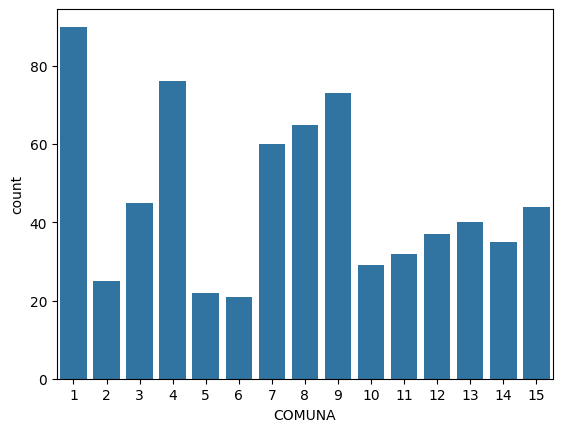

In [14]:
# Ejemplos de visualizaciones
sns.countplot(x='COMUNA', data=hechos['HECHOS'])
plt.show()


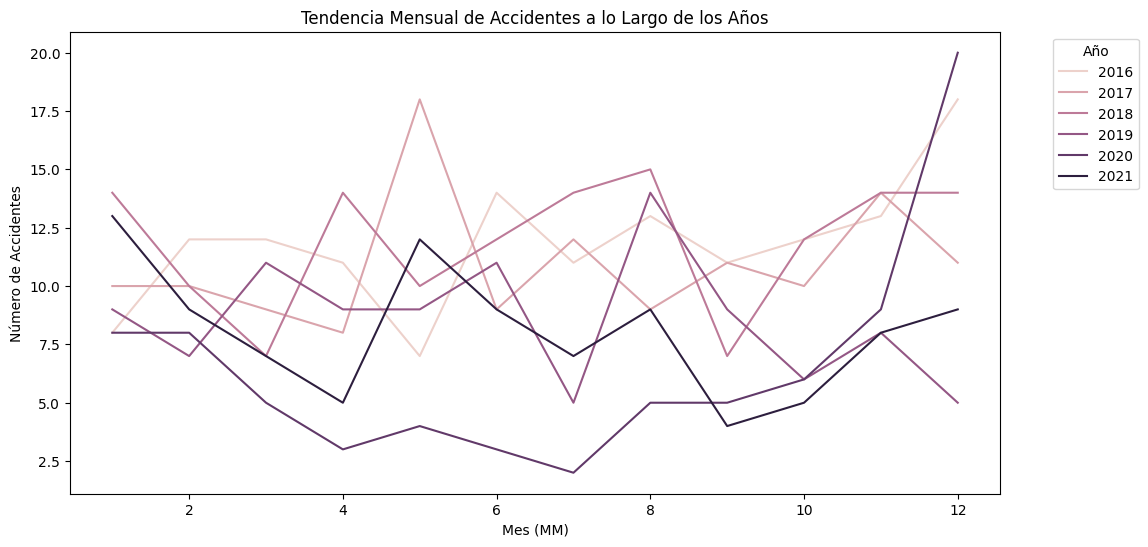

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupa por año y mes, cuenta el número de eventos en cada mes para cada año
conteo_por_ano_mes = hechos['HECHOS'].groupby(['AAAA', 'MM']).size().reset_index(name='Conteo')

# Gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(x='MM', y='Conteo', hue='AAAA', data=conteo_por_ano_mes)
plt.xlabel('Mes (MM)')
plt.ylabel('Número de Accidentes')
plt.title('Tendencia Mensual de Accidentes a lo Largo de los Años')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
